<a href="https://colab.research.google.com/github/Shivani-Pathak/project/blob/main/Project_Laptop_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAPTOP PRICE PREDICTION**

# **CLEANING DATA AND FORMING IT INTO USEFUL DATA**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/campusx-official/laptop-price-predictor-regression-project/main/laptop_data.csv'
df = pd.read_csv(url)

In [3]:
df.head()


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [9]:
df['Ram'] = df['Ram'].str.replace("GB","")
df['Weight'] = df['Weight'].str.replace("Kg"," ")

In [10]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [11]:
df['Ram'] = df['Ram'].astype('int64')
#df['Weight'] = df['Weight'].astype("float64")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 112.1+ KB


In [13]:
import seaborn as sns

<ipython-input-14-87e11caeb2c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

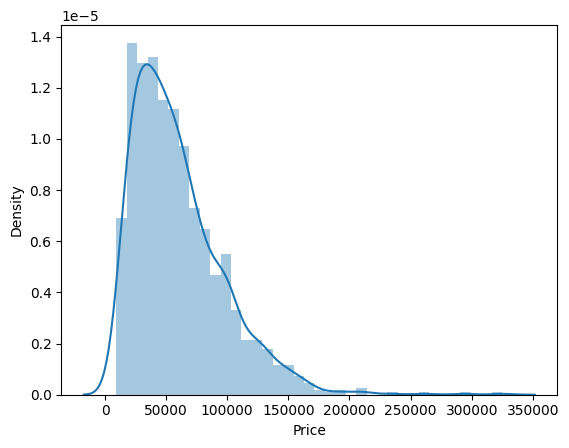

In [14]:
sns.distplot(df['Price'])

<Axes: >

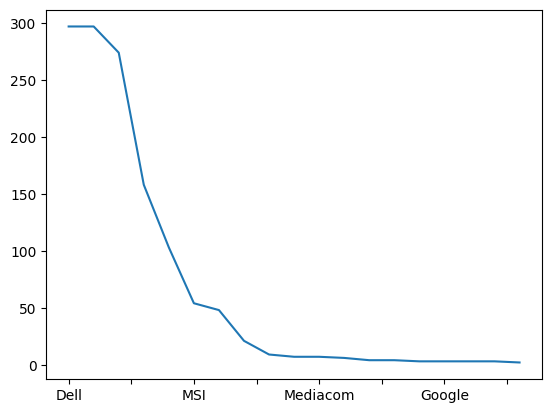

In [15]:
df['Company'].value_counts().plot(kind='line')

<Axes: >

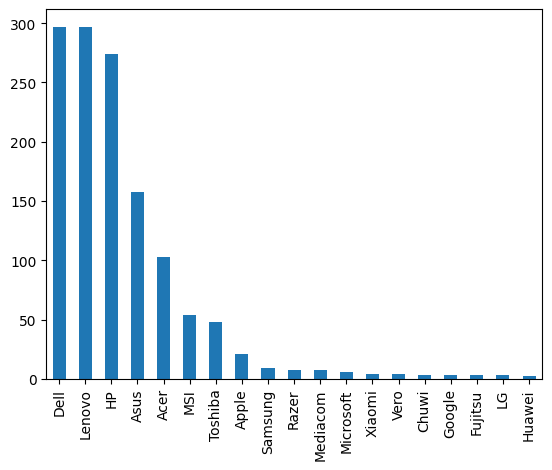

In [16]:
df['Company'].value_counts().plot(kind='bar')

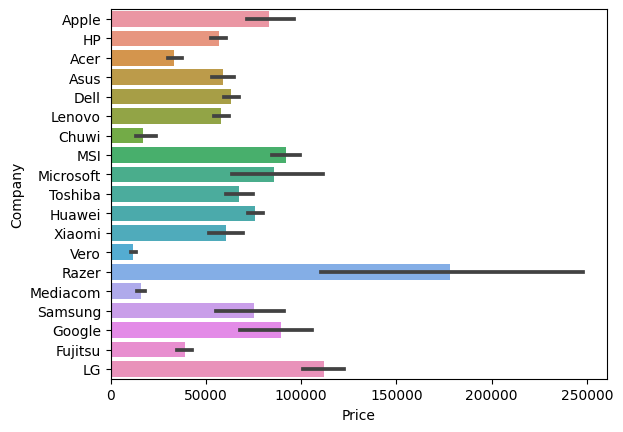

In [17]:
sns.barplot(y=df['Company'],x=df['Price'])
plt.xticks(rotation='horizontal')
plt.show()

<Axes: >

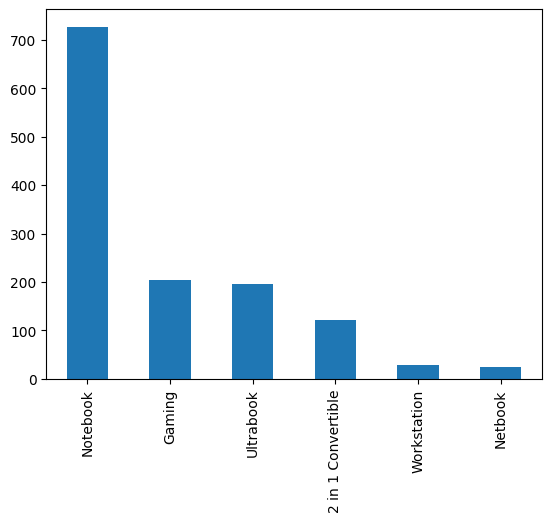

In [18]:
df['TypeName'].value_counts().plot(kind='bar')

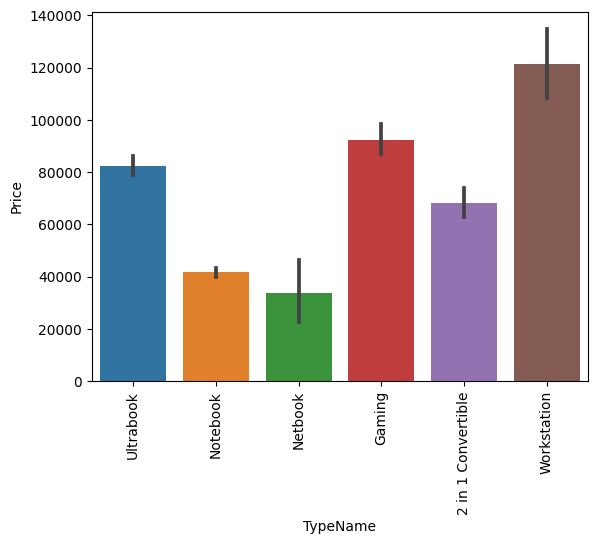

In [19]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

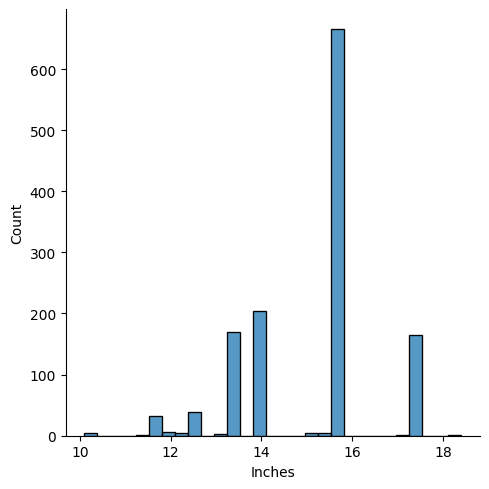

In [20]:
sns.displot(df['Inches'])

<ipython-input-21-51888cb550e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

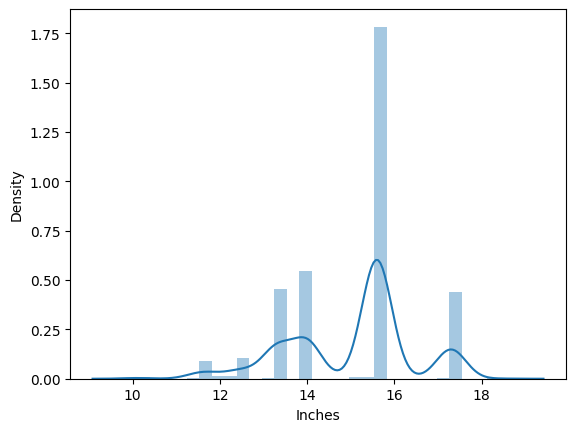

In [21]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

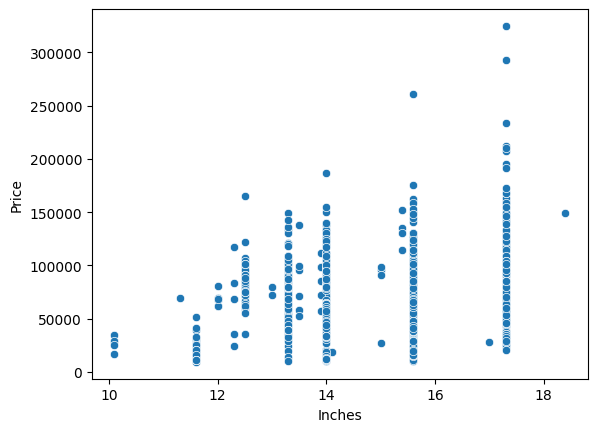

In [22]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

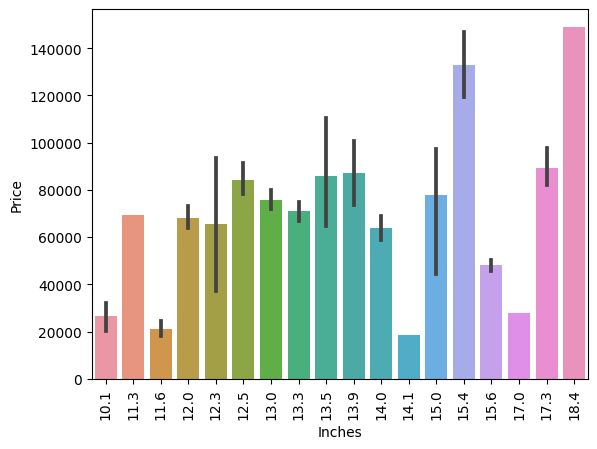

In [23]:
sns.barplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [24]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [25]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [26]:
df.sample(7)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1212,MSI,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.43kg,103842.1872,0
716,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.9kg,62817.1200,0
427,Dell,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel HD Graphics 620,Linux,1.6kg,58554.7200,0
619,Acer,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Quad Core N3160 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25kg,20193.1200,1
524,Dell,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Linux,2.8kg,47365.9200,0
1240,Lenovo,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,31838.5296,0
664,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.7kg,79215.1056,0


<Axes: >

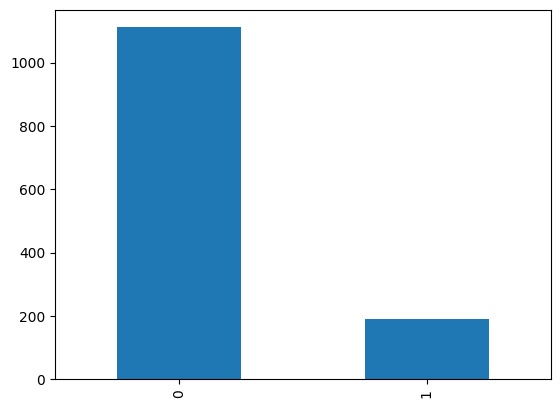

In [27]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

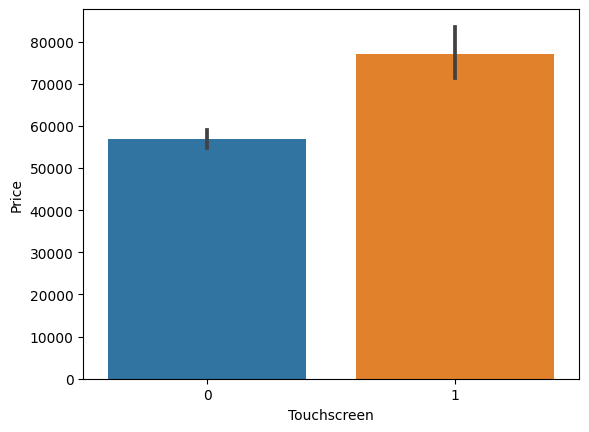

In [28]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [29]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [30]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1


<Axes: >

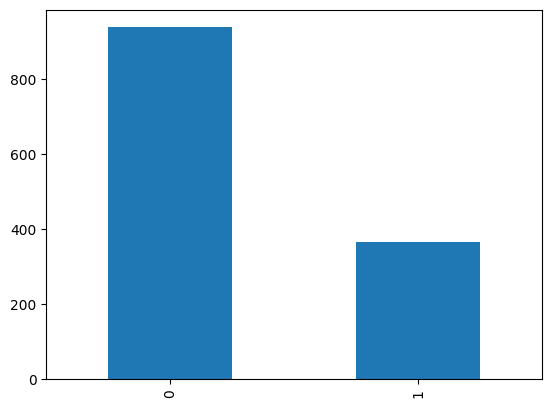

In [31]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

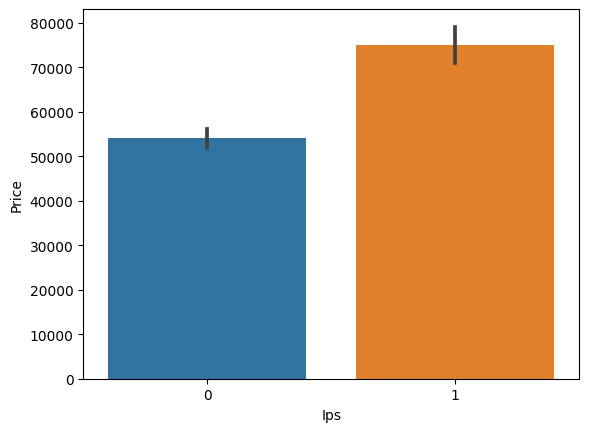

In [32]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [33]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [34]:
df['X_res'] = new[0]
df['Y_res'] = new[1]


In [35]:
df.sample(8)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
707,Lenovo,Workstation,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Nvidia Quadro M520M,Windows 7,2.18kg,98834.4000,0,0,Full HD 1920,1080
164,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Windows 10,2.1kg,18541.4400,0,0,1366,768
335,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.48kg,67559.0400,0,0,Full HD 1920,1080
226,Dell,Notebook,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16,1TB HDD,AMD Radeon R7 M445,Windows 10,2.3kg,45768.0528,1,0,Full HD / Touchscreen 1920,1080
191,Vero,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.3kg,13852.8000,0,1,IPS Panel Full HD 1920,1080
1036,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.04kg,39533.7600,0,0,1366,768
101,HP,Notebook,15.6,Full HD 1920x1080,AMD E-Series E2-9000e 1.5GHz,4,500GB HDD,AMD Radeon R2,Windows 10,2.1kg,18594.7200,0,0,Full HD 1920,1080
370,Asus,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,512GB SSD + 2TB HDD,Nvidia GeForce GT 940MX,Windows 10,2.26kg,58554.7200,1,0,Full HD / Touchscreen 1920,1080


In [36]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [37]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,2560,1600


In [38]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [39]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches'])

In [40]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,2560,1600,226.983005


In [41]:
df['ppi']=df['ppi'].astype('float')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
 15  ppi               1303 non-null   float64
dtypes: float64(3), int64(5), object(8)
memory 

In [43]:
df.corr()['Price']

<ipython-input-43-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [44]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [45]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,2560,1600,226.983005


In [46]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [47]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005


In [48]:
df.drop(columns=['Weight'],inplace=True)

In [49]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,96095.8080,0,1,226.983005


In [50]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [51]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [52]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,96095.8080,0,1,226.983005,Intel Core i5


In [53]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [54]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [55]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: >

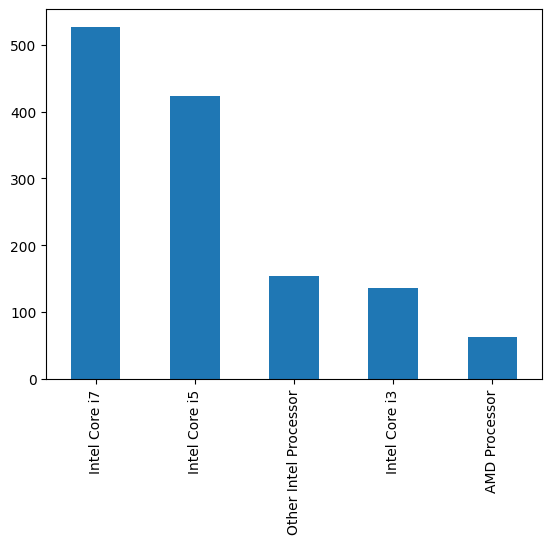

In [56]:
df['Cpu brand'].value_counts().plot(kind='bar')

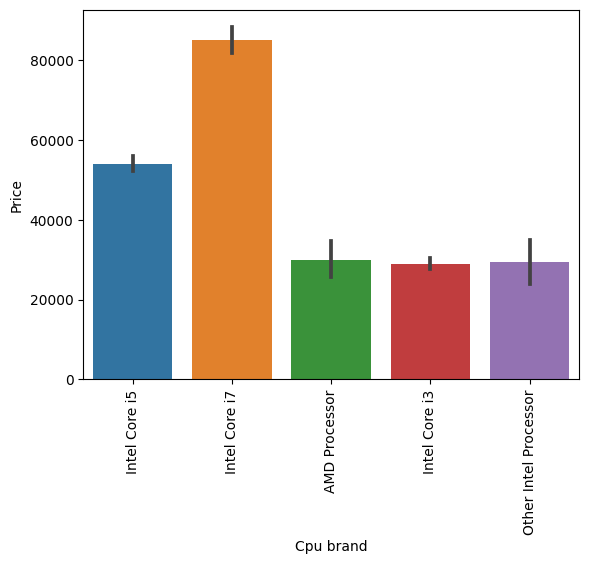

In [57]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [58]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [59]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,96095.8080,0,1,226.983005,Intel Core i5


<Axes: >

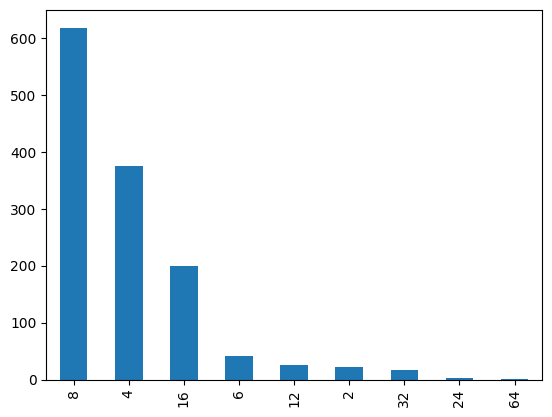

In [60]:
df['Ram'].value_counts().plot(kind='bar')

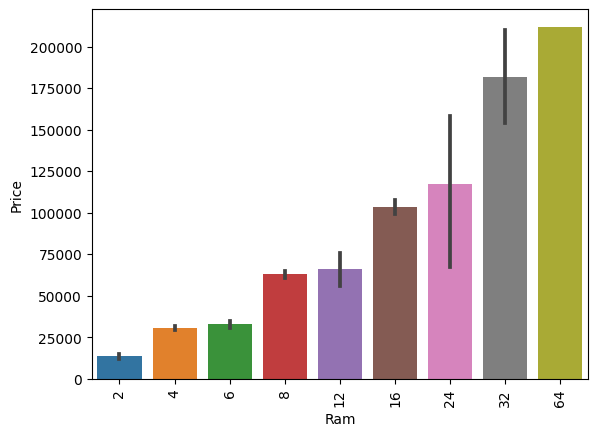

In [61]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [62]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [63]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

<ipython-input-63-10829db803de>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
<ipython-input-63-10829db803de>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [64]:
df.sample(8)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
915,Lenovo,Notebook,4,128 SSD,Intel HD Graphics 620,Windows 10,46939.6800,0,0,165.632118,Intel Core i5,0,128,0,0
150,Dell,Gaming,16,512 SSD,Nvidia GeForce GTX 1050,Windows 10,66560.5728,0,0,141.211998,Intel Core i7,0,512,0,0
193,Lenovo,Notebook,8,256 SSD,Nvidia GeForce MX150,No OS,37189.4400,0,0,106.113062,Intel Core i5,0,256,0,0
248,HP,Notebook,4,500 HDD,Intel UHD Graphics 620,Windows 10,35964.0000,0,1,165.632118,Intel Core i5,500,0,0,0
1128,Lenovo,Gaming,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1060,No OS,52693.9200,0,1,141.211998,Intel Core i5,1000,128,0,0
1003,HP,Notebook,4,500 HDD,Intel HD Graphics 620,Windows 10,41505.1200,0,0,111.935204,Intel Core i5,500,0,0,0
1173,Lenovo,Notebook,4,500 HDD,Intel HD Graphics 520,No OS,21205.4400,0,0,100.454670,Intel Core i5,500,0,0,0
526,Lenovo,Notebook,4,1000 HDD,Nvidia GeForce 920MX,Windows 10,42570.7200,0,0,141.211998,Intel Core i7,1000,0,0,0


In [65]:
df.drop(columns=['Memory'],inplace=True)

In [66]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [67]:
df.corr()['Price']

<ipython-input-67-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram              0.743007
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [68]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [69]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [70]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [71]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [72]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [73]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [74]:
df = df[df['Gpu brand'] != 'ARM']

In [75]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

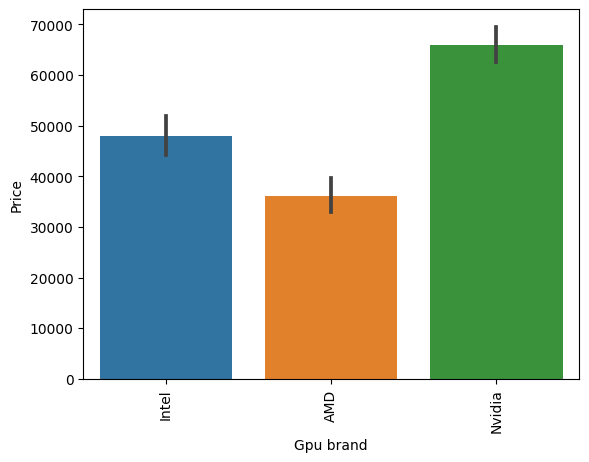

In [76]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [77]:
df.drop(columns=['Gpu'],inplace=True)

In [78]:
df.head()

,Company,TypeName,Ram,OpSys,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [79]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

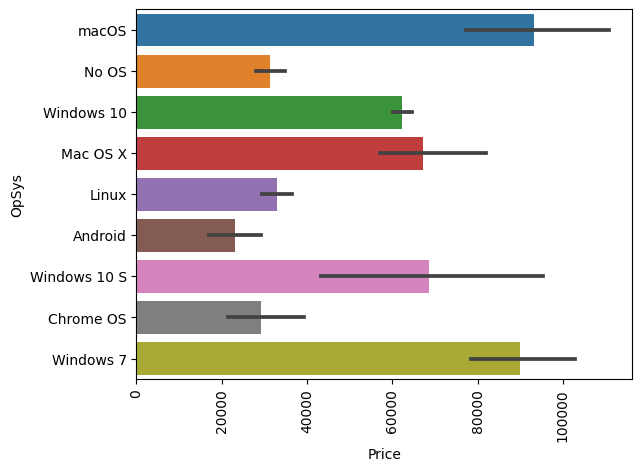

In [80]:
sns.barplot(x=df['Price'],y=df['OpSys'])
plt.xticks(rotation='vertical')
plt.show()

In [81]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/Linux'

In [82]:
df['OS']=df['OpSys'].apply(cat_os)

In [83]:
df.head()

,Company,TypeName,Ram,OpSys,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,macOS,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/Linux
3,Apple,Ultrabook,16,macOS,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [84]:
df.drop(columns=['OpSys'],inplace=True)

In [85]:
df.head()

,Company,TypeName,Ram,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/Linux
3,Apple,Ultrabook,16,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


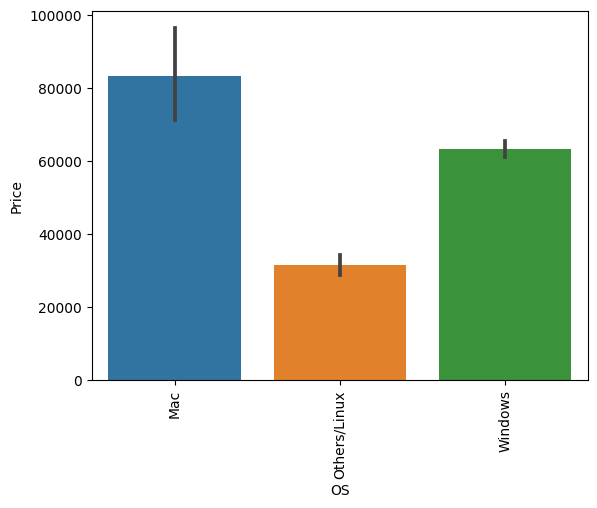

In [86]:
sns.barplot(x=df['OS'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [87]:
df.corr()['Price']

<ipython-input-87-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram            0.742905
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<ipython-input-88-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

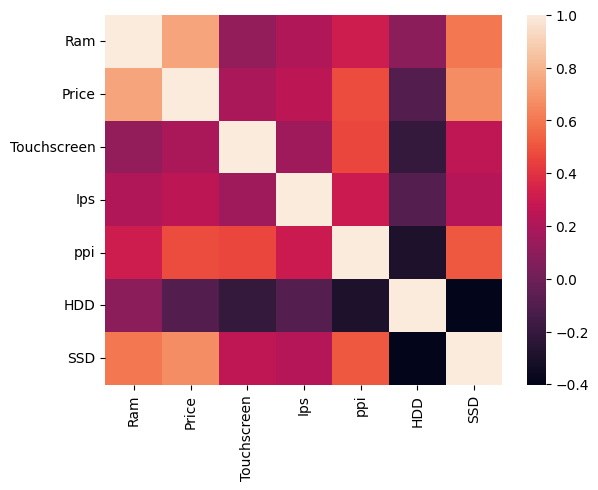

In [88]:
sns.heatmap(df.corr())

<ipython-input-89-c1a82a4801f0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

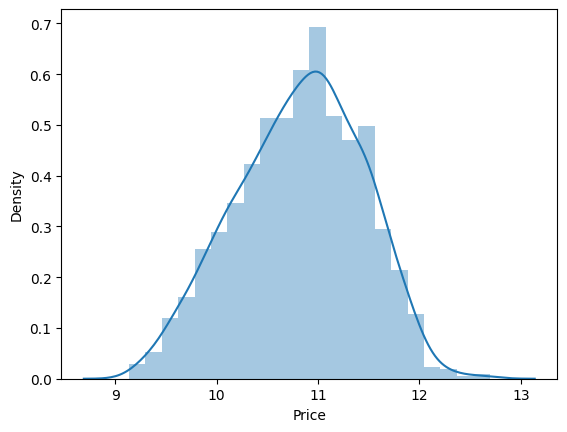

In [89]:
sns.distplot(np.log(df['Price']))

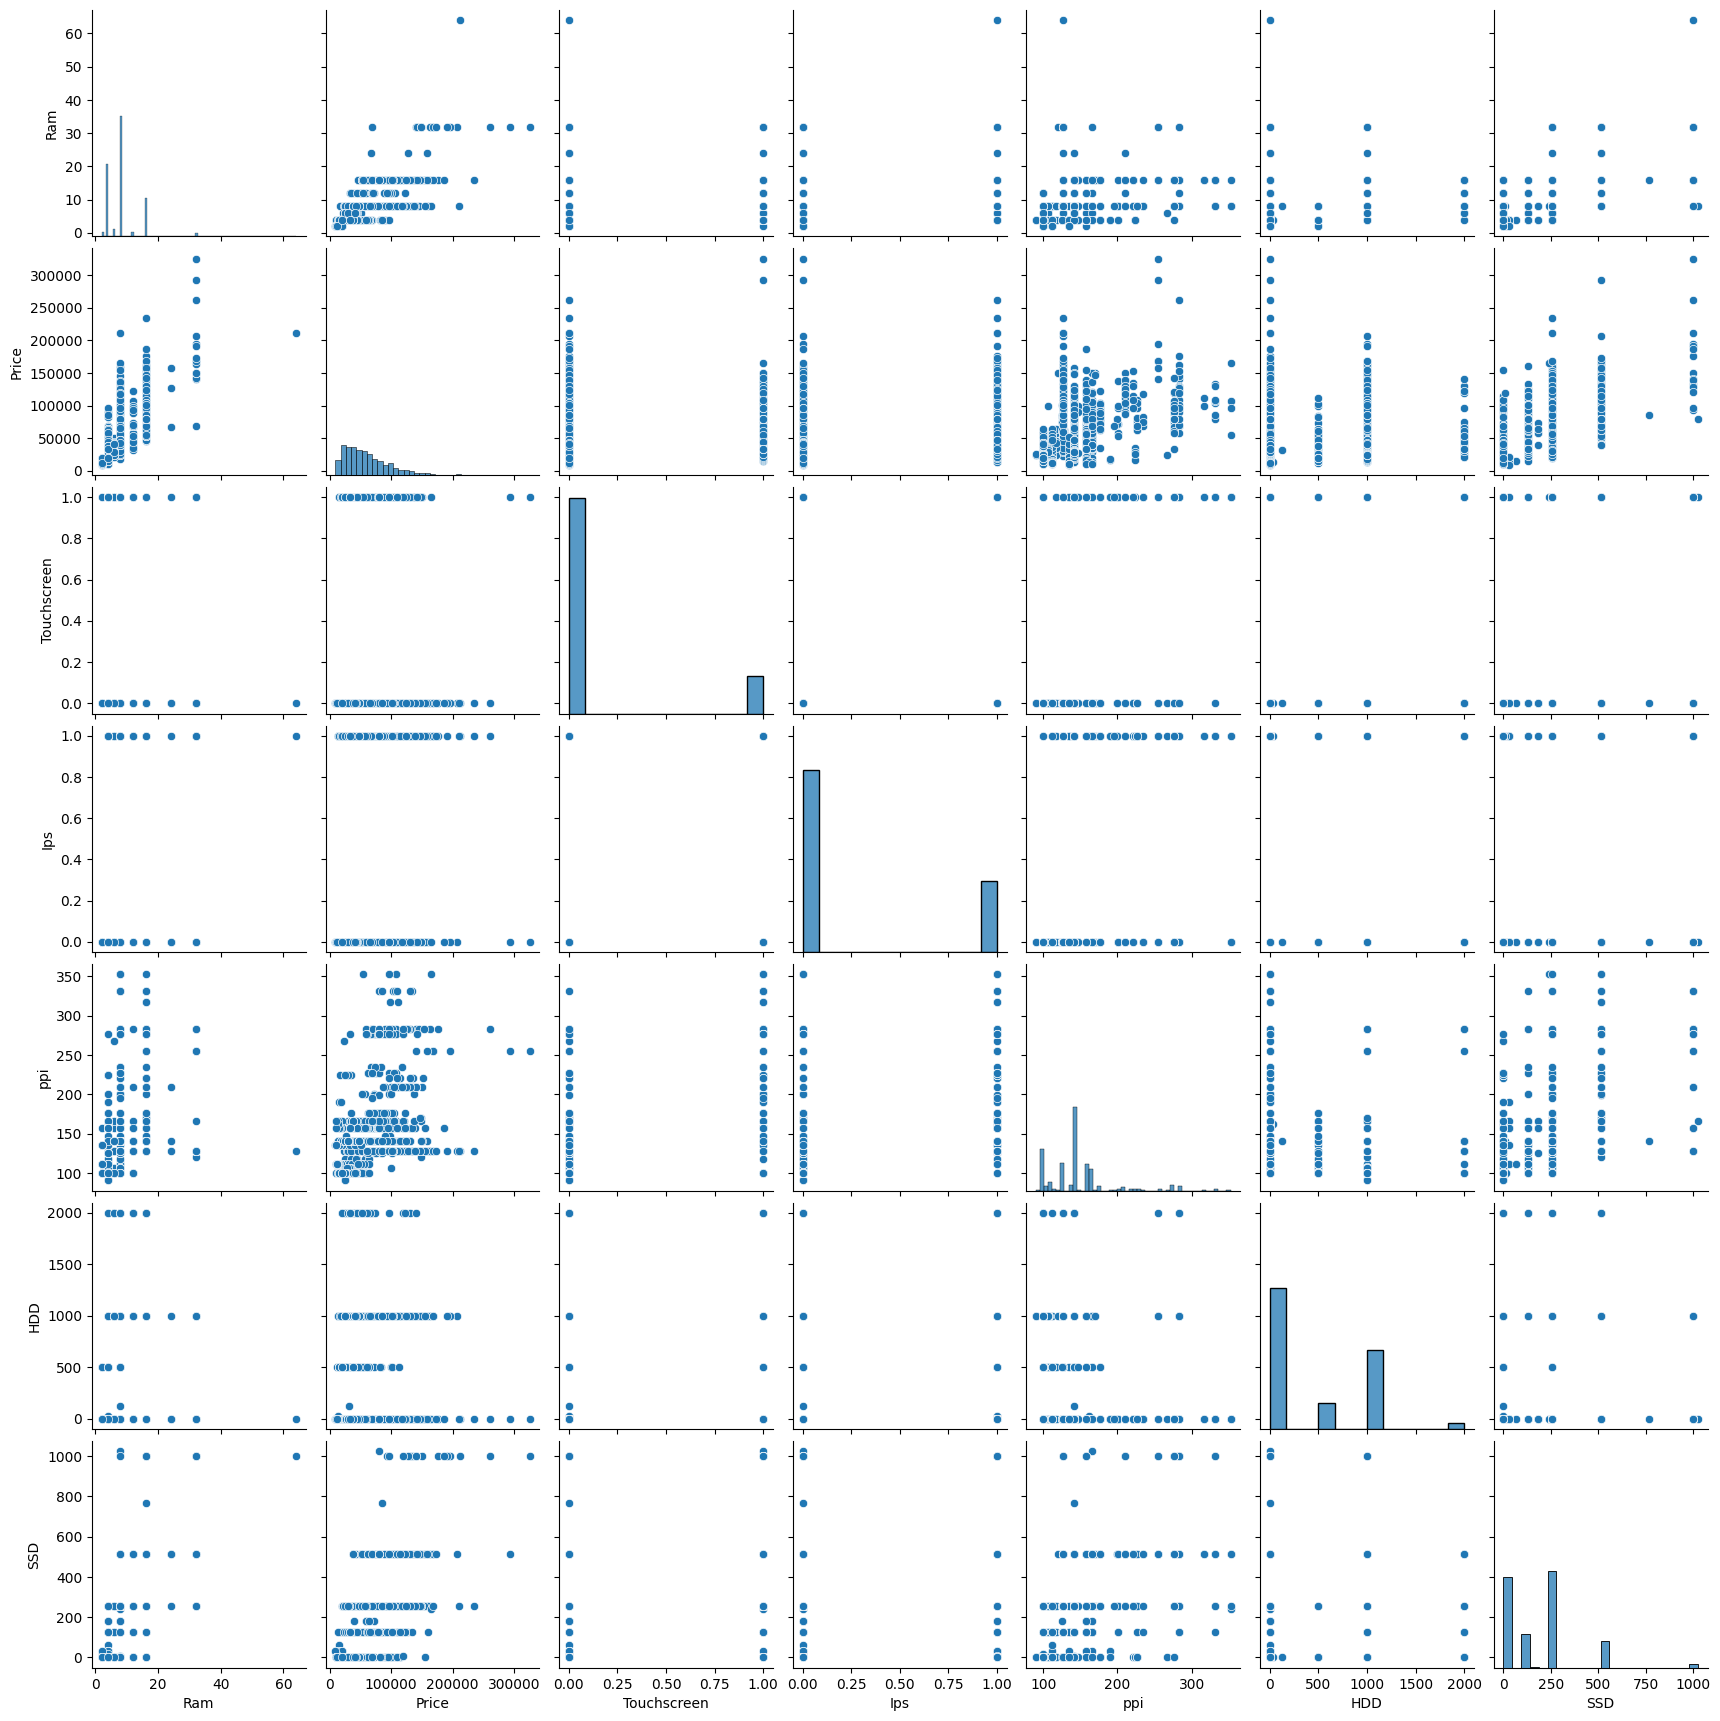

In [90]:
sns.pairplot(df)

In [91]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [92]:
X

,Company,TypeName,Ram,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,0,0,141.211998,Intel Core i5,0,256,Intel,Others/Linux
3,Apple,Ultrabook,16,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [93]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [95]:
X_train


,Company,TypeName,Ram,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,OS
183,Toshiba,Notebook,8,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/Linux
1020,Dell,2 in 1 Convertible,4,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/Linux


In [96]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [98]:
df.head(1)

,Company,TypeName,Ram,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac


# **LINEAR REGRESSION**

In [99]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

In [100]:
step2 = LinearRegression()

In [101]:
pipe = Pipeline([('step1',step1), ('step2',step2)])

In [102]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 6, 9, 10])])),
                ('step2', LinearRegression())])

In [103]:
y_pred = pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8092948938589103
MAE 0.20683990462132743


# **KNN**

In [104]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([ ('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7943306410703965
MAE 0.2008419231666763


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# **DECISION TREE**


In [105]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8321654361614119
MAE 0.1948285307641801


# **EXPORT THE MODEL**

In [106]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [107]:
df

,Company,TypeName,Ram,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/Linux
3,Apple,Ultrabook,16,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [108]:
X_train

,Company,TypeName,Ram,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,OS
183,Toshiba,Notebook,8,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/Linux
1020,Dell,2 in 1 Convertible,4,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/Linux


# **WEBSITE CREATION**

In [109]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 113.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.0 MB/s eta 0:00:00


In [110]:
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.7/718.7 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-7.0.0-py3-none-any.whl size=21129 sha256=7af424225659bd83fd6c0bb950993476edbdbe1931fae920dad31ab0ad821e20
  Stored in directory: /root/.cache/pip/wheels/60/29/7b/f64332aa7e5e88fbd56d4002185ae22dcdc83b35b3d1c2cbf5
Successfully built pyngrok


In [111]:
%%writefile streamlit_app.py

import streamlit as st
st.markdown(""" This is a Streamlit App """)
import pickle
import numpy as np

# import the model
pipe = pickle.load(open('pipe.pkl','rb'))
df = pickle.load(open('df.pkl','rb'))

st.title("Laptop Price Predictor")

# brand
company = st.selectbox('Brand',df['Company'].unique())

# type of laptop
type = st.selectbox('Type',df['TypeName'].unique())

# Ram
ram = st.selectbox('RAM(in GB)',[2,4,6,8,12,16,24,32,64])

# Touchscreen
touchscreen = st.selectbox('Touchscreen',['No','Yes'])

# IPS
ips = st.selectbox('IPS',['No','Yes'])

#Screen Size
screen_size = st.number_input('Screen Size')

# resolution
resolution = st.selectbox('Screen Resolution',['1920x1080','1366x768','1600x900','3840x2160','3200x1800','2880x1800','2560x1600','2560x1440','2304x1440'])

#cpu
cpu = st.selectbox('CPU',df['Cpu brand'].unique())

hdd = st.selectbox('HDD(in GB)',[0,128,256,512,1024,2048])

ssd = st.selectbox('SSD(in GB)',[0,8,128,256,512,1024])

gpu = st.selectbox('GPU',df['Gpu brand'].unique())

os = st.selectbox('OS',df['OS'].unique())

if st.button('Predict Price'):
    # query
    ppi = None
    if touchscreen == 'Yes':
        touchscreen = 1
    else:
        touchscreen = 0

    if ips == 'Yes':
        ips = 1
    else:
        ips = 0

    X_res = int(resolution.split('x')[0])
    Y_res = int(resolution.split('x')[1])
    ppi = ((X_res**2) + (Y_res**2))**0.5/screen_size
    query = np.array([company,type,ram,touchscreen,ips,ppi,cpu,hdd,ssd,gpu,os])

    query = query.reshape(1,11)
    st.title("The predicted price of this configuration is " + str(int(np.exp(pipe.predict(query)[0]))))

Writing streamlit_app.py


In [112]:
!ls

df.pkl	pipe.pkl  sample_data  streamlit_app.py


In [113]:
!ngrok

NAME:
  ngrok - tunnel local ports to public URLs and inspect traffic

USAGE:
  ngrok [command] [flags]

DESCRIPTION: 
  ngrok exposes local networked services behinds NATs and firewalls to the
  public internet over a secure tunnel. Share local websites, build/test
  webhook consumers and self-host personal services.
  Detailed help for each command is available with 'ngrok help <command>'.
  Open http://localhost:4040 for ngrok's web interface to inspect traffic.

Author:
  ngrok - <support@ngrok.com>

TERMS OF SERVICE: https://ngrok.com/tos

EXAMPLES: 
  ngrok http 80                           # secure public URL for port 80 web server
  ngrok http --domain baz.ngrok.dev 8080  # port 8080 available at baz.ngrok.dev
  ngrok http foo.dev:80                   # tunnel to host:port instead of localhost
  ngrok http https://localhost            # expose a local https server
  ngrok tcp 22                            # tunnel arbitrary TCP traffic to port 22
  ngrok tls --domain=foo.com 44

In [114]:
!ngrok authtoken 2CTvJWBb64IvLeufzGTzIuPUvaI_uBEYqV65djaWsVPzMygu

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [2]:
from pyngrok import ngrok

In [3]:
!streamlit run app.py &>/dev/null&

In [118]:
!streamlit run /content/streamlit_app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.31.79.102:8501

npx: installed 22 in 3.67s
your url is: https://yummy-moose-yell.loca.lt
  Stopping...
^C
